In [1]:
#from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv('../02.Data/Boston_house.csv')
df



,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,69.1,391.99,6.593,0.06263,2.4786,11.93,9.67,0.573,21.0,1,0.0,273,0,22.4
502,76.7,396.90,6.120,0.04527,2.2875,11.93,9.08,0.573,21.0,1,0.0,273,0,20.6
503,91.0,396.90,6.976,0.06076,2.1675,11.93,5.64,0.573,21.0,1,0.0,273,0,23.9
504,89.3,393.45,6.794,0.10959,2.3889,11.93,6.48,0.573,21.0,1,0.0,273,0,22.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   AGE      506 non-null    float64
 1   B        506 non-null    float64
 2   RM       506 non-null    float64
 3   CRIM     506 non-null    float64
 4   DIS      506 non-null    float64
 5   INDUS    506 non-null    float64
 6   LSTAT    506 non-null    float64
 7   NOX      506 non-null    float64
 8   PTRATIO  506 non-null    float64
 9   RAD      506 non-null    int64  
 10  ZN       506 non-null    float64
 11  TAX      506 non-null    int64  
 12  CHAS     506 non-null    int64  
 13  Target   506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [3]:
df.shape

(506, 14)

In [4]:
df.describe()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,68.574901,356.674032,6.284634,3.613524,3.795043,11.136779,12.653063,0.554695,18.455534,9.549407,11.363636,408.237154,0.069170,22.532806
std,28.148861,91.294864,0.702617,8.601545,2.105710,6.860353,7.141062,0.115878,2.164946,8.707259,23.322453,168.537116,0.253994,9.197104
min,2.900000,0.320000,3.561000,0.006320,1.129600,0.460000,1.730000,0.385000,12.600000,1.000000,0.000000,187.000000,0.000000,5.000000
25%,45.025000,375.377500,5.885500,0.082045,2.100175,5.190000,6.950000,0.449000,17.400000,4.000000,0.000000,279.000000,0.000000,17.025000
50%,77.500000,391.440000,6.208500,0.256510,3.207450,9.690000,11.360000,0.538000,19.050000,5.000000,0.000000,330.000000,0.000000,21.200000
75%,94.075000,396.225000,6.623500,3.677083,5.188425,18.100000,16.955000,0.624000,20.200000,24.000000,12.500000,666.000000,0.000000,25.000000
max,100.000000,396.900000,8.780000,88.976200,12.126500,27.740000,37.970000,0.871000,22.000000,24.000000,100.000000,711.000000,1.000000,50.000000


<Axes: xlabel='AGE'>

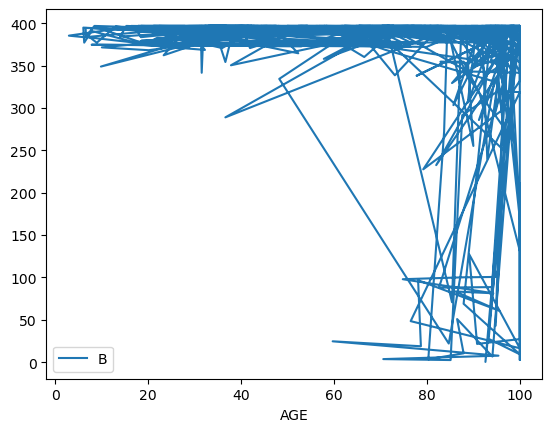

In [5]:
df.plot(x='AGE',y='B')

<Axes: xlabel='AGE', ylabel='B'>

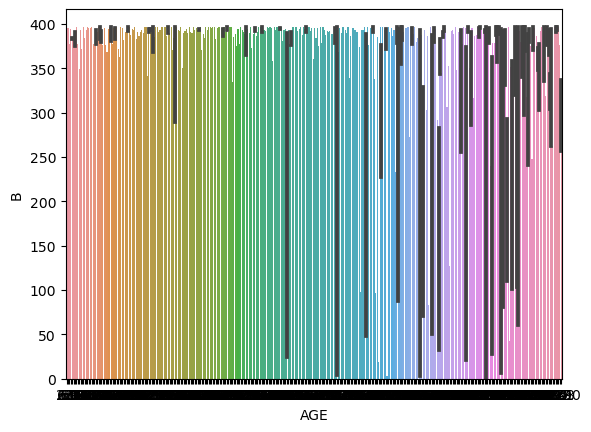

In [6]:
sns.barplot(x=df['AGE'],y=df['B'])

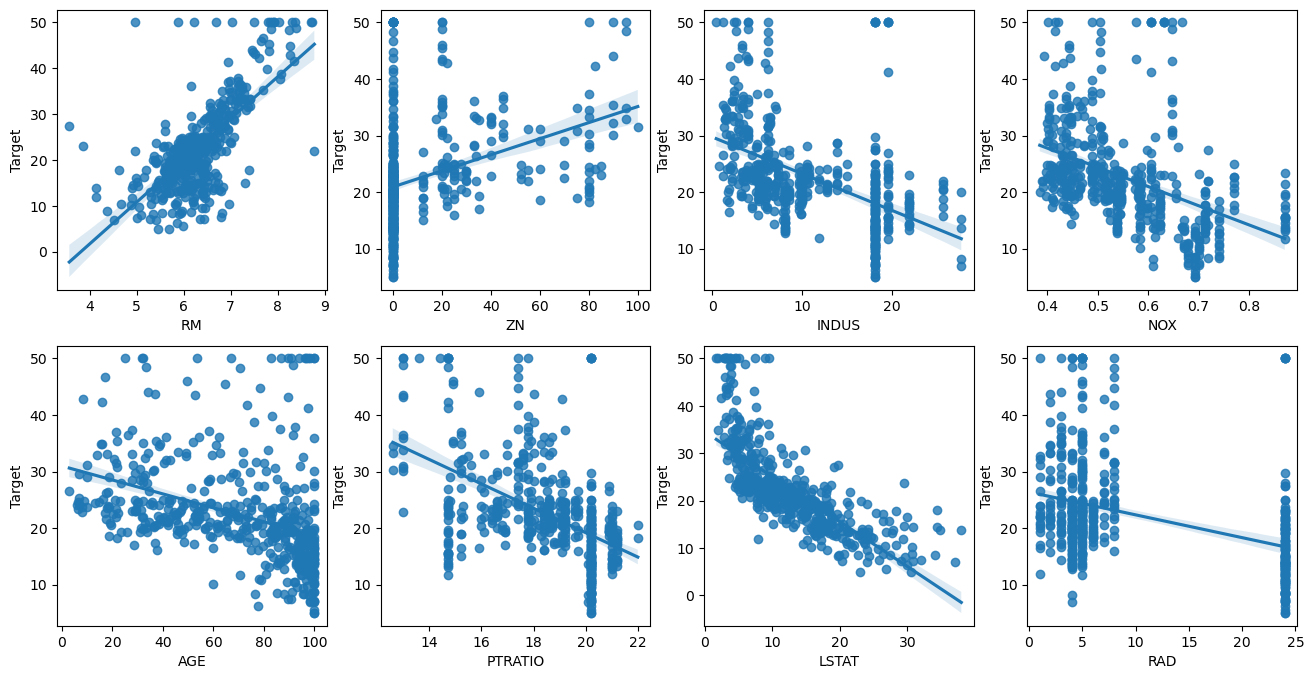

In [7]:
fig, axs = plt.subplots(figsize =(16,8), ncols=4, nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    sns.regplot(x=feature, y='Target',data=df, ax=axs[row][col])

In [8]:
from sklearn.model_selection import train_test_split

y_data = df['Target']
X_data = df.drop(['Target'],axis=1,inplace=False)
X_train,X_test,y_train,y_test = train_test_split(X_data,y_data,test_size=0.3,random_state=156)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
lr = LinearRegression()
lr.fit(X_train,y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse, rmse))
print('Variance score : {0: .3f}'.format(r2_score(y_test,y_preds)))

MSE : 17.297 , RMSE : 4.159
Variance score :  0.757


In [10]:
print('절편 값:',lr.intercept_)
print('회귀 계수값:',np.round(lr.coef_,1))

절편 값: 40.99559517216477
회귀 계수값: [  0.    0.    3.4  -0.1  -1.7   0.   -0.6 -19.8  -0.9   0.4   0.1  -0.
   3. ]


In [11]:
coeff = pd.Series(data=np.round(lr.coef_,1), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
AGE         0.0
B           0.0
INDUS       0.0
TAX        -0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [12]:
from sklearn.model_selection import cross_val_score

y_target = df['Target']
X_data = df.drop(['Target'],axis=1,inplace=False)
lr = LinearRegression()

neg_mse_scores = cross_val_score(lr,X_data,y_target,scoring='neg_mean_squared_error',cv=5)

rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores,2))
print('5 folds 의 개별 RMSE scores:',np.round(rmse_scores,2))
print('5 folds 의 평균 RMSE : {0: .3f}'.format(avg_rmse))

5 folds 의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds 의 개별 RMSE scores: [3.53 5.1  5.75 8.99 5.77]
5 folds 의 평균 RMSE :  5.829


### 릿지(Ridge)회귀 : L2 규제

In [13]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

bostonDF = pd.read_csv('../02.Data/Boston_house.csv')
bostonDF

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,69.1,391.99,6.593,0.06263,2.4786,11.93,9.67,0.573,21.0,1,0.0,273,0,22.4
502,76.7,396.90,6.120,0.04527,2.2875,11.93,9.08,0.573,21.0,1,0.0,273,0,20.6
503,91.0,396.90,6.976,0.06076,2.1675,11.93,5.64,0.573,21.0,1,0.0,273,0,23.9
504,89.3,393.45,6.794,0.10959,2.3889,11.93,6.48,0.573,21.0,1,0.0,273,0,22.0


In [14]:
y_target = bostonDF['Target']
X_data = bostonDF.drop(['Target'],axis=1,inplace=False)

In [15]:
ridge = Ridge(alpha=10)  # default alpha : 1
neg_mse_scores = cross_val_score(ridge,X_data,y_target,scoring='neg_mean_squared_error',cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores,2))
print('5 folds 의 개별 RMSE scores:',np.round(rmse_scores,2))
print('5 folds 의 평균 RMSE : {0: .3f}'.format(avg_rmse))

5 folds 의 개별 Negative MSE scores:  [-11.42 -24.29 -28.14 -74.6  -28.52]
5 folds 의 개별 RMSE scores: [3.38 4.93 5.31 8.64 5.34]
5 folds 의 평균 RMSE :  5.518


In [16]:
alphas = [0, 0.1, 1, 10, 100]
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    
    neg_mse_scores = cross_val_score(ridge,X_data,y_target,scoring='neg_mean_squared_error',cv=5)
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f}'.format(alpha,avg_rmse))

alpha 0 일 때 5 folds 의 평균 RMSE : 5.829


alpha 0.1 일 때 5 folds 의 평균 RMSE : 5.788
alpha 1 일 때 5 folds 의 평균 RMSE : 5.653
alpha 10 일 때 5 folds 의 평균 RMSE : 5.518
alpha 100 일 때 5 folds 의 평균 RMSE : 5.330


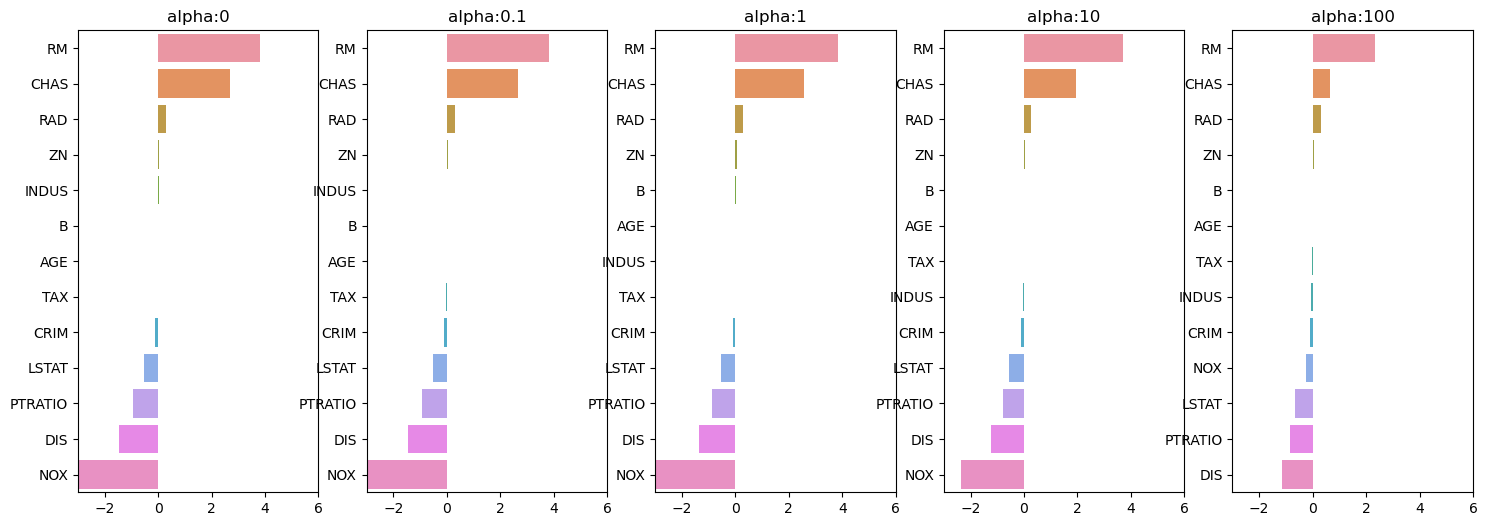

In [17]:
# alpha에 따른 회귀 계수 값을 시각화
fig, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=5)
coeff_df = pd.DataFrame()
for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_data,y_target)
    coeff = pd.Series(data=ridge.coef_, index=X_data.columns)
    colname = 'alpha:'+str(alpha)
    coeff_df[colname] = coeff
    
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y= coeff.index,ax=axs[pos])
plt.show()

In [18]:
ridge_alphas = [0,0.1,1,10,100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column,ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


### 라쏘(Lasso) : L1 규제

In [19]:
from sklearn.linear_model import Lasso,ElasticNet

def get_linear_reg_eval(model_name,params=None, X_data_n=None,y_target_n=None,verbose=True,return_coeff=True):
    coeff_df = pd.DataFrame()
    for param in params:
        if model_name == 'Ridge' : model = Ridge(alpha=param)
        elif model_name == 'Lasso' : model = Lasso(alpha=param)
        elif model_name == 'ElasticNet' : model = ElasticNet(alpha=param,l1_ratio=0.7)
        
        neg_mse_scores = cross_val_score(model, X_data_n,y_target_n, scoring='neg_mean_squared_error', cv=5)
        print(neg_mse_scores)
        
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0} 일 떄 5 폴드 세트의 평균 RMSE:{1:.3f}'.format(param,avg_rmse))
        
        model.fit(X_data_n,y_target_n)
        if return_coeff:
            # alpha에 따른 피처별 회귀 계수를 Serires로 변환하고 이를 DataFrame의 컬럼으로 추가
            coeff = pd.Series(data=model.coef_, index=X_data_n.columns)
            colname = 'alpha:'+str(param)
            coeff_df[colname] = coeff
            
    return coeff_df
            

In [20]:
lasso_alphas = [0.07,0.1,0.5,1,3]
coeff_lasso_df = get_linear_reg_eval('Lasso',params=lasso_alphas,X_data_n=X_data,y_target_n=y_target)

[-11.16976052 -24.3784533  -28.53669854 -80.4895423  -29.90099713]
alpha 0.07 일 떄 5 폴드 세트의 평균 RMSE:5.612
[-11.22232974 -24.34312313 -29.42594207 -79.36632798 -29.7935063 ]
alpha 0.1 일 떄 5 폴드 세트의 평균 RMSE:5.615
[-12.46639314 -27.59166109 -42.24980731 -67.19562096 -23.66774314]
alpha 0.5 일 떄 5 폴드 세트의 평균 RMSE:5.669
[-15.14194669 -33.33112212 -53.29276061 -56.60176261 -19.28987015]
alpha 1 일 떄 5 폴드 세트의 평균 RMSE:5.776
[-22.75234378 -36.89211845 -71.60050793 -52.54195513 -19.26977479]
alpha 3 일 떄 5 폴드 세트의 평균 RMSE:6.189


In [21]:
print(lasso_alphas)

[0.07, 0.1, 0.5, 1, 3]


In [22]:
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column,ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789730,3.703192,2.498176,0.949782,0.000000
CHAS,1.434346,0.955172,0.000000,0.000000,0.000000
RAD,0.270932,0.274717,0.277443,0.264221,0.061898
ZN,0.049065,0.049218,0.049556,0.049180,0.037248
B,0.010248,0.010249,0.009468,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011708,-0.010039,0.003601,0.020909,0.042504
TAX,-0.014290,-0.014571,-0.015442,-0.015213,-0.008604
INDUS,-0.042124,-0.036620,-0.005258,-0.000000,-0.000000
CRIM,-0.098196,-0.097900,-0.083293,-0.063444,-0.000000


### 엘라스틱넷(ELasticNet): L1규제 + L2규제 
* l1_ratio = a/a+b

In [25]:
elastic_alphas= [0.07,0.1,0.5,1,3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet',params=elastic_alphas,X_data_n=X_data, y_target_n=y_target)

[-11.39732122 -24.60647124 -29.00014674 -74.97702064 -28.38105069]
alpha 0.07 일 떄 5 폴드 세트의 평균 RMSE:5.542
[-11.50478184 -24.77152482 -29.99802474 -72.64521623 -27.67151857]
alpha 0.1 일 떄 5 폴드 세트의 평균 RMSE:5.526
[-13.14357255 -28.19006857 -40.67317863 -54.66342079 -21.41934751]
alpha 0.5 일 떄 5 폴드 세트의 평균 RMSE:5.467
[-14.91505534 -31.21177813 -50.88344324 -49.16463811 -19.2789865 ]
alpha 1 일 떄 5 폴드 세트의 평균 RMSE:5.597
[-21.21177058 -35.60273513 -68.37403154 -50.85256253 -19.08010408]
alpha 3 일 떄 5 폴드 세트의 평균 RMSE:6.068


In [27]:
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column,ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.574171,3.414153,1.918399,0.938889,0.000000
CHAS,1.330718,0.979702,0.000000,0.000000,0.000000
RAD,0.278882,0.283443,0.300767,0.289276,0.146873
ZN,0.050112,0.050623,0.052890,0.052149,0.038285
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010117,-0.008279,0.007758,0.020342,0.043440
TAX,-0.014522,-0.014814,-0.016047,-0.016218,-0.011419
INDUS,-0.044855,-0.042720,-0.023247,-0.000000,-0.000000
CRIM,-0.099472,-0.099217,-0.089076,-0.073582,-0.019069
NOX,-0.175011,-0.000000,-0.000000,-0.000000,-0.000000
